<a href="https://colab.research.google.com/github/diego40g/data_science_python/blob/numpy/211_quandl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade quandl
!pip install --upgrade jhtalib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 3.3 MB/s 


In [2]:
import quandl
import jhtalib as jhta
import matplotlib.pyplot as plt

In [3]:
quandl_data = quandl.get('BCHARTS/BITSTAMPUSD', start_date='2011-01-01', end_date='2018-11-01', order='asc', collapse='daily', returns='numpy')

In [4]:
df = {'datetime': [], 'Open': [], 'High': [], 'Low': [], 'Close': [], 'Volume': []}
i = 0
while i < len(quandl_data['Close']):
  df['datetime'].append(str(quandl_data['Date'][i]))
  df['Open'].append(float(quandl_data['Open'][i]))
  df['High'].append(float(quandl_data['High'][i]))
  df['Low'].append(float(quandl_data['Low'][i]))
  df['Close'].append(float(quandl_data['Close'][i]))
  df['Volume'].append(int(quandl_data['Volume (BTC)'][i]))
  i += 1

x = df['datetime']

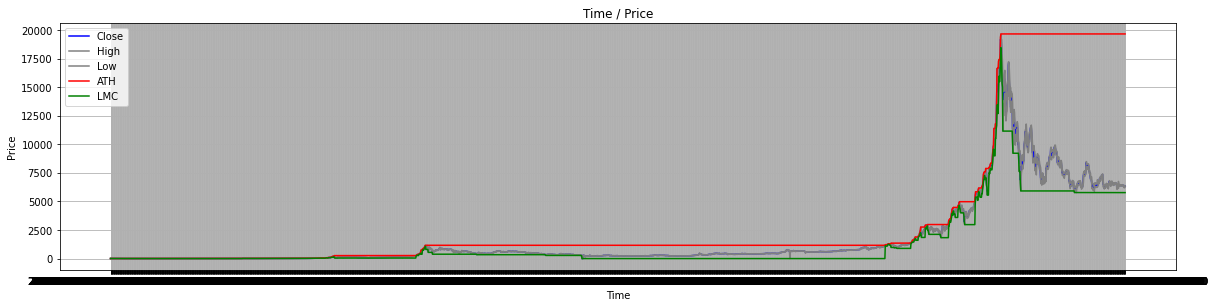

In [5]:
plt.figure(1, figsize=(20, 10))
plt.subplot(211)
plt.title('Time / Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(x, df['Close'], color='blue')
plt.plot(x, df['High'], color='grey')
plt.plot(x, df['Low'], color='grey')
plt.plot(x, jhta.ATH(df)['ath'], color='red')
plt.plot(x, jhta.LMC(df)['lmc'], color='green')
plt.legend(['Close', 'High', 'Low', 'ATH', 'LMC'], loc='upper left')

In [6]:
plt.show()